In [1]:
#Assignment 02 by YangYi12432892
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#1.Significant earthquakes since 2150 B.C.
#指定正确的分隔符，指定解析文件时使用的引擎为python
Sig_Eqs=pd.read_csv('earthquakes-2024-10-29_02-03-56_+0800.tsv',sep='\t',engine='python')

In [5]:
#1.1
total_deaths=Sig_Eqs.groupby(['Country']).sum()['Deaths']
total_deaths.sort_values(ascending=False).head(20)

Country
CHINA           2075947.0
TURKEY          1188881.0
IRAN            1011453.0
ITALY            498418.0
SYRIA            439224.0
HAITI            323478.0
AZERBAIJAN       317219.0
JAPAN            279607.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135496.0
TURKMENISTAN     117412.0
PERU             102169.0
ISRAEL            90388.0
PORTUGAL          83572.0
GREECE            80378.0
CHILE             64277.0
INDIA             63507.0
TAIWAN            57153.0
Name: Deaths, dtype: float64

In [7]:
#1.2
total_earthquakes=Sig_Eqs[Sig_Eqs['Mag']>3.0]
quake_per_year=total_earthquakes.groupby(Sig_Eqs['Year'])['Mag'].count()
quake_per_year

Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2020.0    28
 2021.0    42
 2022.0    41
 2023.0    45
 2024.0    12
Name: Mag, Length: 604, dtype: int64

<Axes: xlabel='Year'>

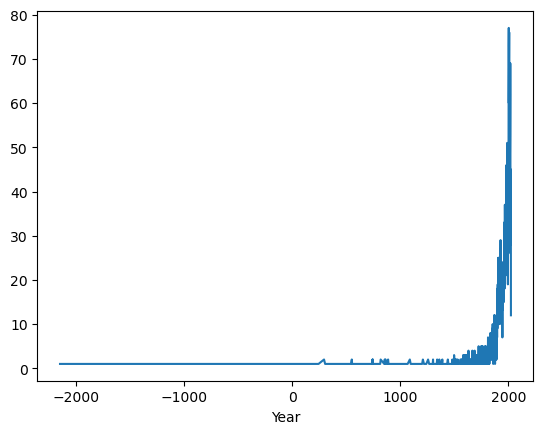

In [9]:
quake_per_year.plot()

可以看出绘制的图象一开始呈平稳趋势，从1500左右开始逐渐增高，并且趋势越来越快，
因此可以得知大约从公元1500年地震的频率开始逐渐增高，并且增高的越来越快，但是2000年左右又有减小的趋势。

In [12]:
#1.3
#本题我向我的师兄赵望超寻求了帮助
import pandas as pd
def CountEq_LargestEq(country):
    country_data = Sig_Eqs[Sig_Eqs['Country'] == country]
    total_eq = len(country_data)
    # 找出最大的地震
    if total_eq > 0:
        largest_eq = country_data.sort_values('Ms', ascending=False)
        largest_date = f"{largest_eq.iloc[0]['Year']}-{largest_eq.iloc[0]['Mo']}-{largest_eq.iloc[0]['Dy']}"
        largest_location = largest_eq.iloc[0]['Location Name']
    else:
        largest_eq = 0
        largest_date = "No earthquakes"
        largest_location = "No earthquakes"
    return country, total_eq, largest_date, largest_location
# 应用函数并存储结果
results = []
for country in Sig_Eqs['Country'].unique():
    result = CountEq_LargestEq(country)
    results.append(result)
# 将结果转换为DataFrame
results_df = pd.DataFrame(results, columns=['Country', 'Total_Earthquakes', 'Largest_Earthq_Date', 'Largest_Earthq_Location'])
# 按地震总数降序排序
sorted_results_df = results_df.sort_values(by='Total_Earthquakes', ascending=False)
print(sorted_results_df)

                      Country  Total_Earthquakes Largest_Earthq_Date  \
15                      CHINA                623    1920.0-12.0-16.0   
34                      JAPAN                419      869.0-7.0-13.0   
71                  INDONESIA                412    2004.0-12.0-26.0   
8                        IRAN                386     856.0-12.0-22.0   
10                     TURKEY                337     1999.0-8.0-17.0   
..                        ...                ...                 ...   
120                  KIRIBATI                  1     1905.0-6.0-30.0   
126                     PALAU                  1    1914.0-10.0-23.0   
128  CENTRAL AFRICAN REPUBLIC                  1     1921.0-9.0-16.0   
135                     LIBYA                  1     1963.0-2.0-21.0   
0                         NaN                  0      No earthquakes   

                           Largest_Earthq_Location  
15         CHINA:  GANSU PROVINCE, SHANXI PROVINCE  
34                           

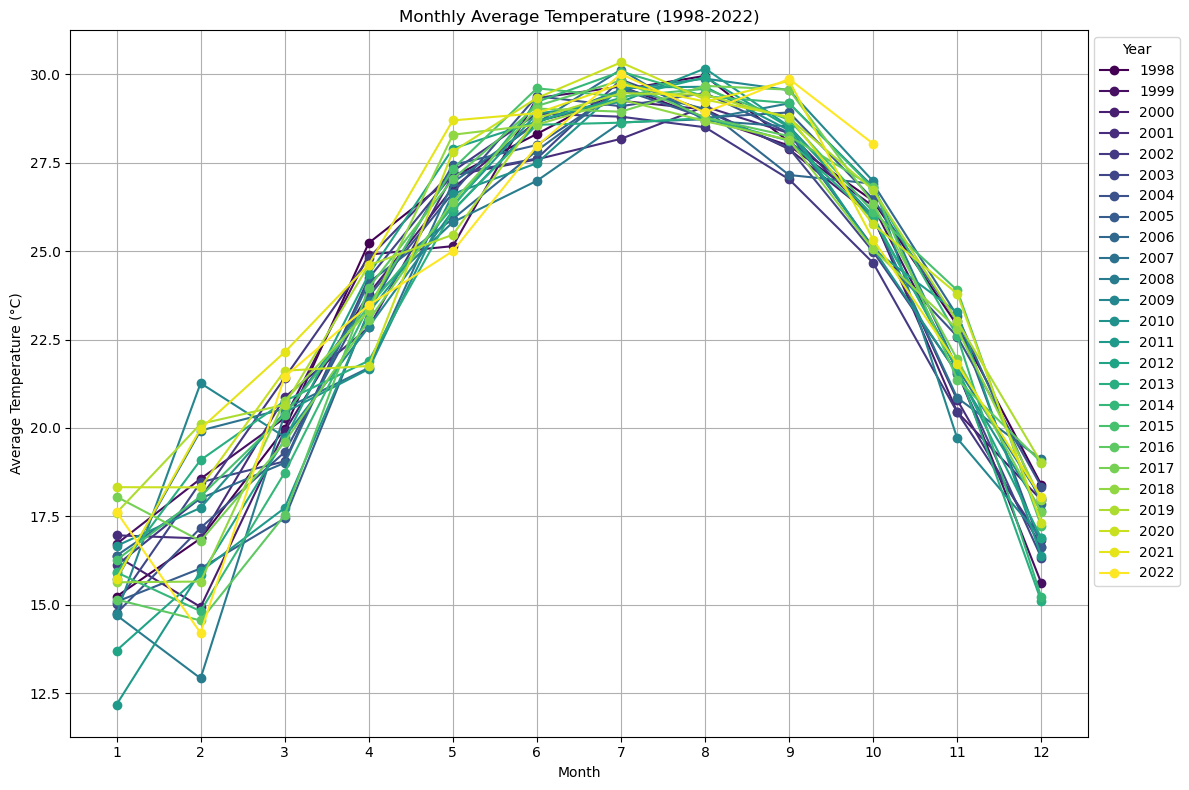

In [14]:
#2.Air temperature in Shenzhen during the past 25 years
#本题我向我的师姐龙师倩寻求了帮助

data = pd.read_csv("Baoan_Weather_1998_2022.csv")
# 分割TMP列，筛选掉T为9999的行以及j不是0,1,4,5的行
data[['T', 'j']] = data['TMP'].str.split(',', expand=True)
data = data[(data['T'] != '9999') & (data['j'].isin(['0', '1', '4', '5']))]
# 将TMP列转换为数值类型，并将无法转换的值设置为NaN
data['TMP'] = pd.to_numeric(data['T'], errors='coerce')
# 去除TMP列中的NaN值
data = data.dropna(subset=['TMP'])
# 确保 'DATE' 列是 datetime 类型
data['DATE'] = pd.to_datetime(data['DATE'])
# 提取年份和月份
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
# 计算月平均气温
monthly_avg_temp = data.groupby(['Year', 'Month'])['TMP'].mean().reset_index()
# 绘制图表
plt.figure(figsize=(12, 8))
# 获取唯一的年份并为每个年份生成颜色
unique_years = monthly_avg_temp['Year'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_years)))
for i, year in enumerate(unique_years):
    year_data = monthly_avg_temp[monthly_avg_temp['Year'] == year]
    plt.plot(year_data['Month'], year_data['TMP']/10, marker='o', label=str(year), color=colors[i])
plt.title('Monthly Average Temperature (1998-2022)')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(range(1, 13))  # 设置x轴刻度为1到12
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.75)
plt.tight_layout()  # 调整布局
plt.show()

①过滤数据的方法：Baoan_Weather_1998_2022.csv中TMP列是空气温度，列表中数据逗号后面的数值代表数据的可信程度，数值为0,1,4,5的表示通过了所有质量检查可信要保留，数值为其他值的表示怀疑要筛除，以及+9999为数据丢失，要筛除，以此来过滤TMP中的数据。
②从绘制出的月平均气温与观测时间关系图可以看出过去25年的月平均气温的变化趋势，整体来说从1-12月气温先升高，后下降，其中在7-8月份达到气温最高值大约30℃。

In [17]:
#3.Global collection of hurricanes
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values={'NAME':'NOT_NAMED','WMO_WIND': ' '})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,NaN,,,main,0,0,__________P___


In [18]:
#3.1
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')
# 根据SID和NAME分组，计算每组的最大WMO_WIND
grouped = df.groupby(['SID', 'NAME'])['WMO_WIND'].max().reset_index()
# 按照WMO_WIND降序排序，得到top10
top_10 = grouped.sort_values('WMO_WIND', ascending=False).head(10)
print(top_10)

                SID      NAME  WMO_WIND
5027  2015293N13266  PATRICIA     185.0
2114  1980214N11330     ALLEN     165.0
2813  1988253N12306   GILBERT     160.0
4230  2005289N18282     WILMA     160.0
3603  1997253N12255     LINDA     160.0
5346  2019236N10314    DORIAN     160.0
4546  2009288N07267      RICK     155.0
5171  2017242N16333      IRMA     155.0
4220  2005261N21290      RITA     155.0
3688  1998295N12284     MITCH     155.0


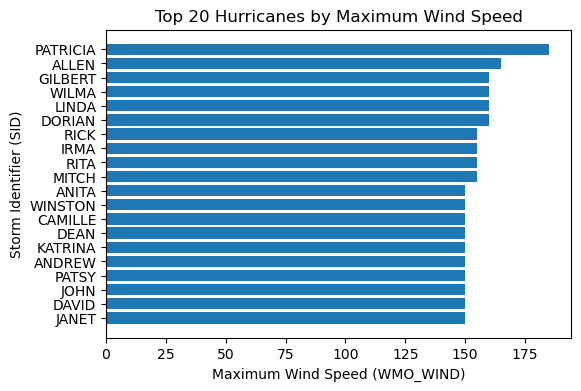

In [21]:
#3.2
# 按WMO_WIND降序排序，得到top20
top_20 = grouped.sort_values('WMO_WIND', ascending=False).head(20)
# 绘制柱状图
plt.figure(figsize=(6, 4))
plt.barh(top_20['NAME'], top_20['WMO_WIND'])
plt.xlabel('Maximum Wind Speed (WMO_WIND)')
plt.ylabel('Storm Identifier (SID)')
plt.title('Top 20 Hurricanes by Maximum Wind Speed')
plt.gca().invert_yaxis()
plt.show()

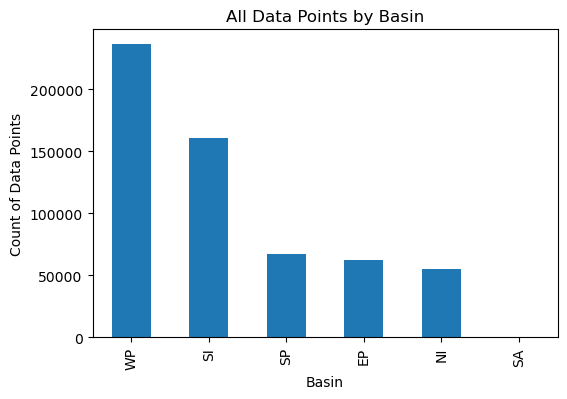

In [23]:
#3.3
basin_counts = df['BASIN'].value_counts()
# 绘制柱状图
plt.figure(figsize=(6, 4))
basin_counts.plot(kind='bar')
plt.xlabel('Basin')
plt.ylabel('Count of Data Points')
plt.title('All Data Points by Basin')
plt.show()

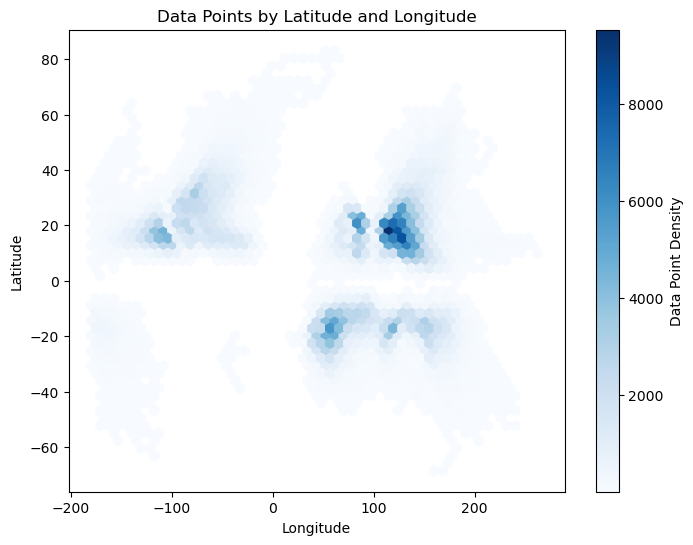

In [25]:
#3.4
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')
# 创建hexbin plot
plt.figure(figsize=(8, 6))
hb = plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(hb, label='Data Point Density')
plt.title('Data Points by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# 输出图表
plt.show()

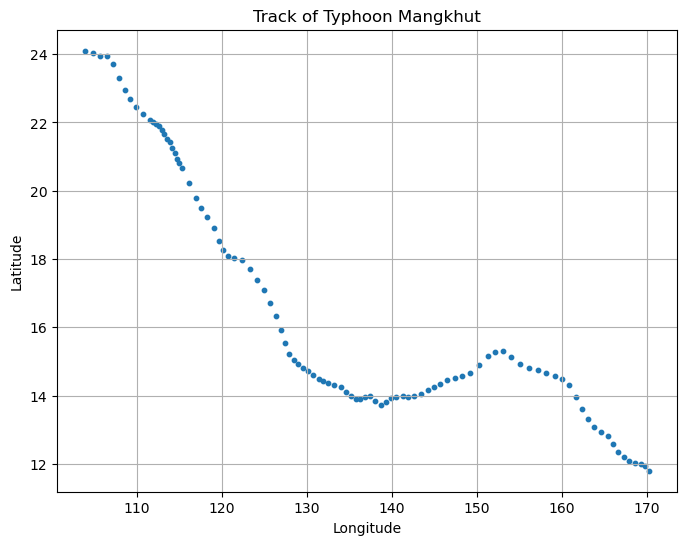

In [27]:
#3.5
Mankhum = df[(df['NAME'] == 'MANGKHUT') & (df['SEASON'] == 2018)]
# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(Mankhum['LON'], Mankhum['LAT'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut')
plt.grid(True)
plt.show()

In [29]:
#3.6
df = df[df['SEASON'] >= 1970]
df_1970 = df[(df['BASIN'] == 'WP') | (df['BASIN'] == 'EP')]
df_1970

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006,tokyo,main,1088,1088,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,,,main,1109,1109,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002,tokyo,main,1143,1143,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,,,main,1171,1168,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998,tokyo,main,1182,1179,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707084,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,,,PROVISIONAL,0,0,P_____________
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,,,PROVISIONAL,0,,O_____________
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,,,PROVISIONAL,1985,1974,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,,,PROVISIONAL,1974,1952,P_____________


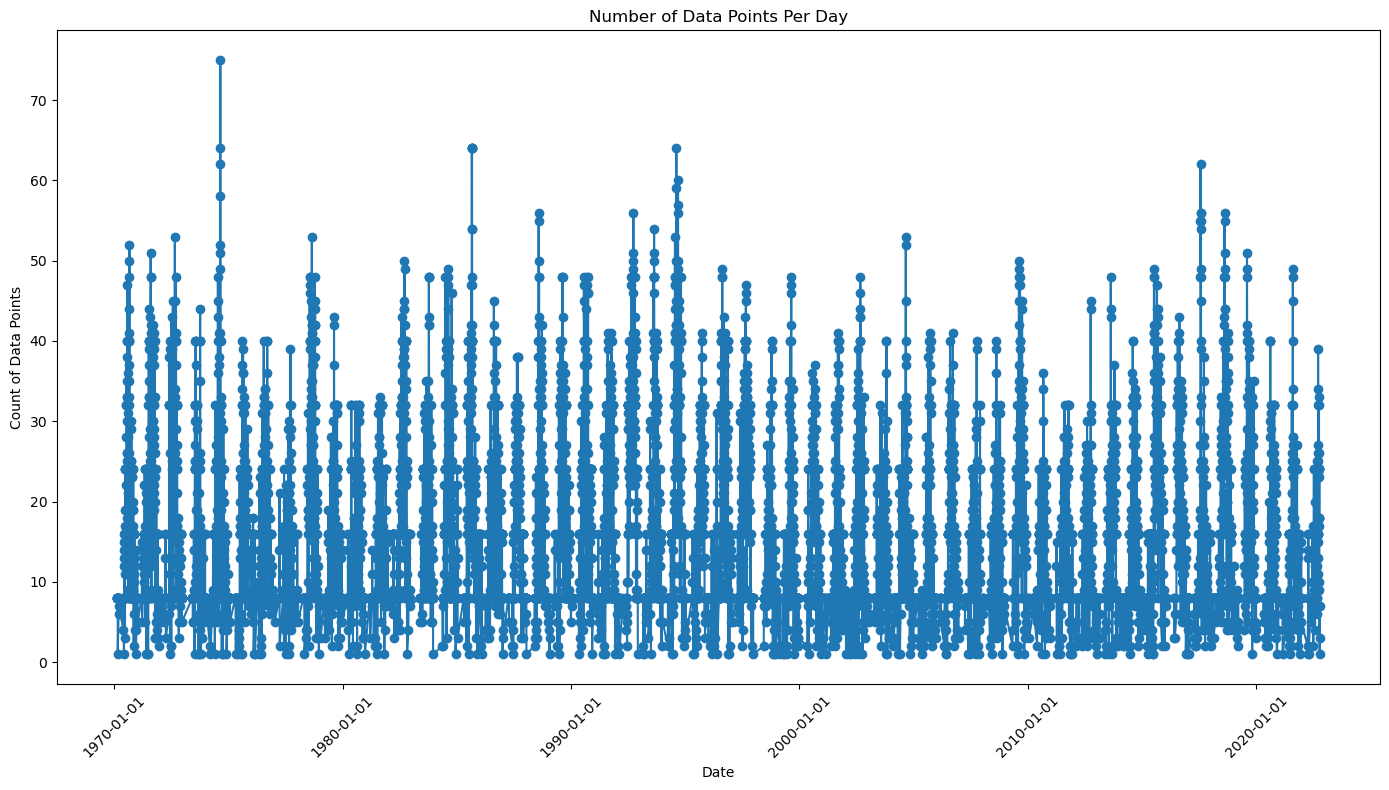

In [31]:
#3.7
import matplotlib.dates as mdates
df_1970['ISO_TIME'] = pd.to_datetime(df_1970['ISO_TIME'], errors='coerce')
df_1970 = df_1970.dropna(subset=['ISO_TIME'])
# 按日期计算数据点的数量
daily_counts = df_1970['ISO_TIME'].dt.date.value_counts().sort_index()
# 绘制折线图
plt.figure(figsize=(14, 8))
plt.plot(daily_counts.index, daily_counts.values, linestyle='-',marker='o')
# 设置x轴的日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# 设置x轴和y轴的标签
plt.xlabel('Date')
plt.ylabel('Count of Data Points')
plt.title('Number of Data Points Per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

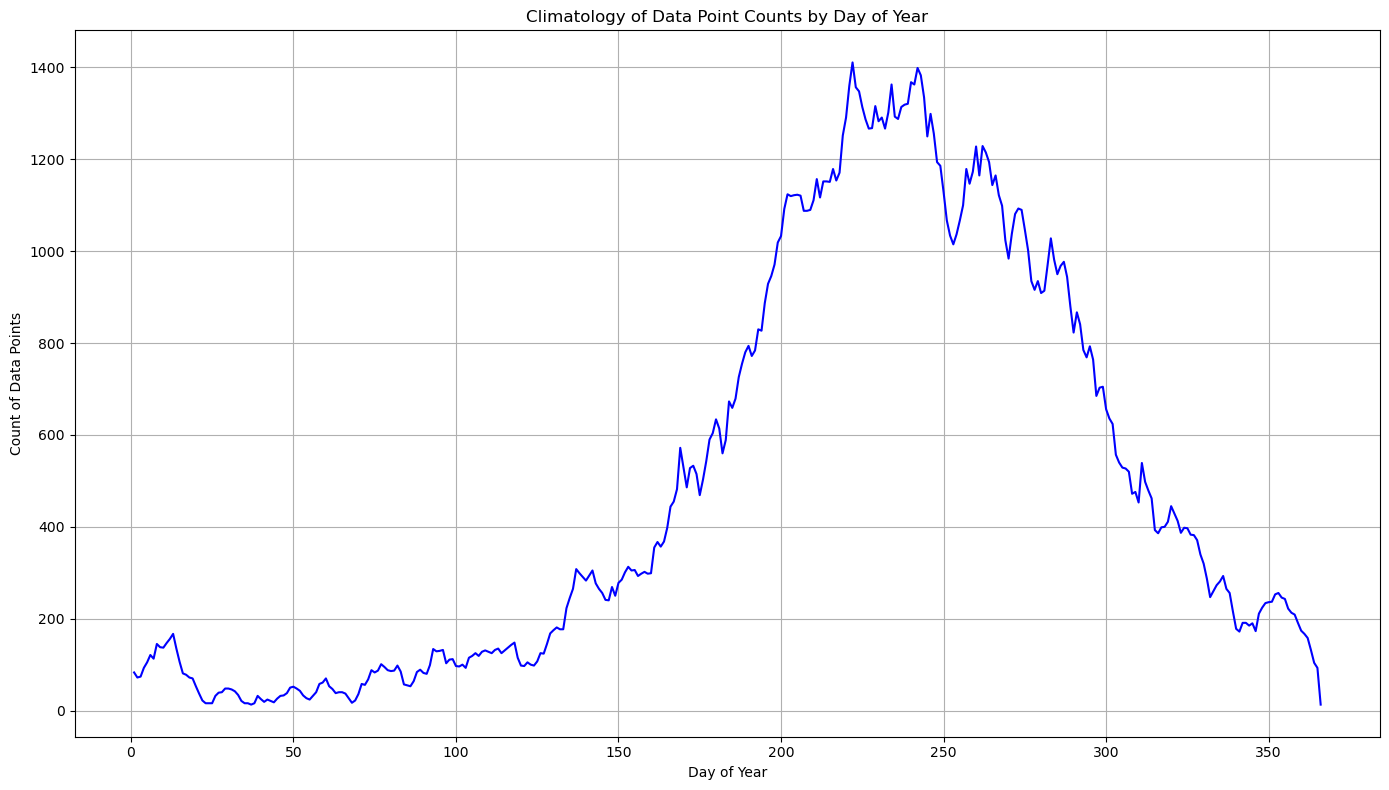

In [33]:
#3.8
# 计算一年中的第几天
df_1970['Day of Year'] = df_1970['ISO_TIME'].dt.dayofyear
# 按一年中的第几天计算数据点的数量
day_of_year_counts = df_1970['Day of Year'].value_counts().sort_index()
# 绘制折线图
plt.figure(figsize=(14, 8))
plt.plot(day_of_year_counts.index, day_of_year_counts.values, color='b')
# 设置x、y轴的标签
plt.xlabel('Day of Year')
plt.ylabel('Count of Data Points')
plt.title('Climatology of Data Point Counts by Day of Year')
plt.tight_layout()
plt.grid()
plt.show()

     Day of Year  Actual_Count  Anomaly
0              1            83      NaN
1              2            72    -11.0
2              3            74      2.0
3              4            93     19.0
4              5           105     12.0
..           ...           ...      ...
361          362           158     -9.0
362          363           132    -26.0
363          364           104    -28.0
364          365            93    -11.0
365          366            13    -80.0

[366 rows x 3 columns]


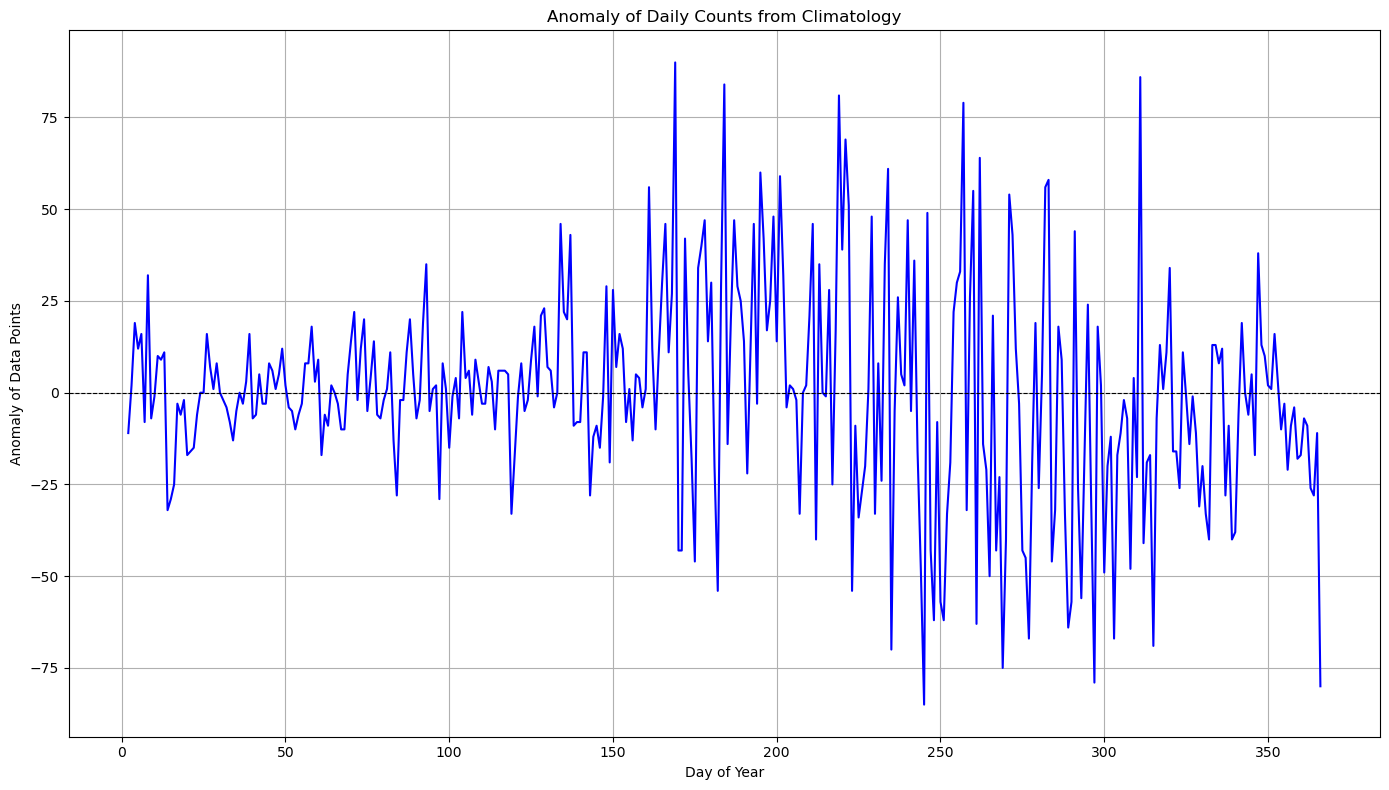

In [41]:
#3.9
#计算气候学平均值
climatology_mean = df_1970.groupby('Day of Year').size().reset_index(name='Climatology_Count')
#计算每天的数据点数量
daily_counts = df_1970.groupby('Day of Year').size().reset_index(name='Actual_Count')
#计算异常值
daily_counts['Anomaly']=daily_counts['Actual_Count']- climatology_mean.set_index('Day of Year')['Climatology_Count']
#绘制异常值折线图
print(daily_counts)
plt.figure(figsize=(14,8))
plt.plot(daily_counts['Day of Year'],daily_counts['Anomaly'],color='b')
plt.axhline(0,color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Day of Year')
plt.ylabel('Anomaly of Data Points')
plt.title('Anomaly of Daily Counts from Climatology')
plt.grid(True)
plt.tight_layout()
plt.show()

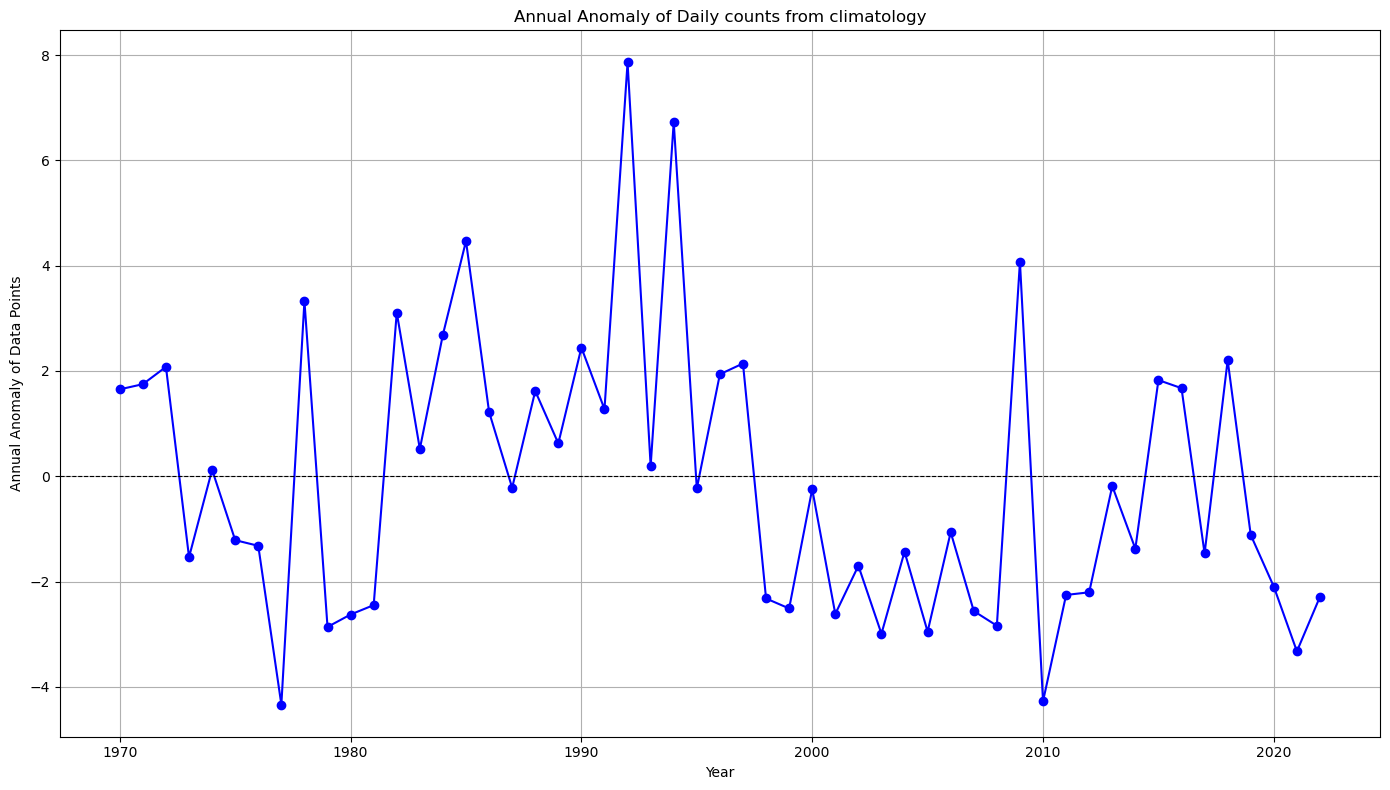

In [57]:
#3.10
df_1970['ISO_TIME']= pd.to_datetime(df_1970['ISO_TIME'])
#计算每日数据点数量
daily_counts2 = df_1970['ISO_TIME'].dt.date.value_counts().sort_index()
#将每日计数转换为时间序列
daily_counts2 = pd.Series(daily_counts2.values, index=pd.to_datetime(daily_counts2.index))
# 计算气候学平均值
climatology_mean2= daily_counts2.mean() 
# 计算异常值
anomalies = daily_counts2 - climatology_mean2
#将异常值设置为时间序列
anomalies.index = pd.to_datetime(anomalies.index)
#以年分辨率进行重采样并计算均值
annual_anomalies =anomalies.resample('Y').mean()
#绘制年均异常值图表
plt.figure(figsize=(14,8))
plt.plot(annual_anomalies.index.year, annual_anomalies, color='b', marker='o')
plt.axhline(0,color='black',linestyle='--', linewidth=0.8)
plt.xlabel('Year')
plt.ylabel('Annual Anomaly of Data Points')
plt.title('Annual Anomaly of Daily counts from climatology')
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
print(annual_anomalies)
#从折线图以及输出结果中可以看出飓风特别异常的年份主要有1992年，1994年，2010年等。

ISO_TIME
1970-12-31    1.651319
1971-12-31    1.749405
1972-12-31    2.078169
1973-12-31   -1.536355
1974-12-31    0.123379
1975-12-31   -1.213339
1976-12-31   -1.321164
1977-12-31   -4.337540
1978-12-31    3.330107
1979-12-31   -2.862050
1980-12-31   -2.625954
1981-12-31   -2.447371
1982-12-31    3.110567
1983-12-31    0.519690
1984-12-31    2.691697
1985-12-31    4.468618
1986-12-31    1.222197
1987-12-31   -0.218226
1988-12-31    1.619426
1989-12-31    0.624433
1990-12-31    2.444673
1991-12-31    1.274551
1992-12-31    7.861025
1993-12-31    0.194782
1994-12-31    6.729332
1995-12-31   -0.232160
1996-12-31    1.938153
1997-12-31    2.142118
1998-12-31   -2.321408
1999-12-31   -2.511092
2000-12-31   -0.243444
2001-12-31   -2.616023
2002-12-31   -1.699453
2003-12-31   -2.991598
2004-12-31   -1.432537
2005-12-31   -2.951468
2006-12-31   -1.063030
2007-12-31   -2.560369
2008-12-31   -2.838941
2009-12-31    4.073244
2010-12-31   -4.274449
2011-12-31   -2.254313
2012-12-31   -2.204170
20

In [75]:
#4
#数据来源于ROBBINSTON,ME US(National Centers for Environmental Information (NCEI))
ROB=pd.read_csv("USC00177238.csv",engine='python')
ROB

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USC00177238,1994-11,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",NaN,NaN,0.0,",0",...,158.9,",,,0",96.0,",,,0",4.00,",0",9.35,",,,0",-1.36,",,,0"
1,USC00177238,1994-12,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",NaN,NaN,0.0,",0",...,94.1,",,,0",169.0,",,,0",-2.68,",0",1.68,",,,0",-7.03,",,,0"
2,USC00177238,1995-01,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",0.0,0.0,0.0,",0",...,137.4,",,,0",564.0,",,,0",-4.96,",0",-1.24,",,,0",-8.69,",,,0"
3,USC00177238,1995-02,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",0.0,0.0,0.0,",0",...,94.2,",,,0",678.0,",,,0",-8.05,",0",-1.65,",,,0",-14.46,",,,0"
4,USC00177238,1995-03,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",0.0,0.0,0.0,",0",...,72.7,",,,0",179.0,",,,0",-0.74,",0",3.98,",,,0",-5.45,",,,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,USC00177238,2024-05,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",0.0,NaN,0.0,",7",...,61.4,",,,7",0.0,"1,,,7",12.44,",7",18.35,",,,7",6.53,",,,7"
355,USC00177238,2024-06,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",26.6,NaN,26.6,",7",...,100.4,",,,7",0.0,",,,7",17.56,",7",23.76,",,,7",11.37,",,,7"
356,USC00177238,2024-07,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",96.0,NaN,69.4,",7",...,125.8,",,,7",0.0,",,,7",20.27,",7",25.74,",,,7",14.80,",,,7"
357,USC00177238,2024-08,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",142.5,NaN,46.5,",7",...,80.5,",,,7",0.0,",,,7",19.42,",7",24.91,",,,7",13.94,",,,7"


In [77]:
#4.1
ROB=ROB.dropna(axis=1,how="all")
ROB=ROB.fillna(axis=0,method='bfill')
ROB

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,...,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USC00177238,1994-11,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",0.0,0.0,0.0,",0",...,158.9,",,,0",96.0,",,,0",4.00,",0",9.35,",,,0",-1.36,",,,0"
1,USC00177238,1994-12,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",0.0,0.0,0.0,",0",...,94.1,",,,0",169.0,",,,0",-2.68,",0",1.68,",,,0",-7.03,",,,0"
2,USC00177238,1995-01,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",0.0,0.0,0.0,",0",...,137.4,",,,0",564.0,",,,0",-4.96,",0",-1.24,",,,0",-8.69,",,,0"
3,USC00177238,1995-02,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",0.0,0.0,0.0,",0",...,94.2,",,,0",678.0,",,,0",-8.05,",0",-1.65,",,,0",-14.46,",,,0"
4,USC00177238,1995-03,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",0.0,0.0,0.0,",0",...,72.7,",,,0",179.0,",,,0",-0.74,",0",3.98,",,,0",-5.45,",,,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,USC00177238,2024-05,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",0.0,NaN,0.0,",7",...,61.4,",,,7",0.0,"1,,,7",12.44,",7",18.35,",,,7",6.53,",,,7"
355,USC00177238,2024-06,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",26.6,NaN,26.6,",7",...,100.4,",,,7",0.0,",,,7",17.56,",7",23.76,",,,7",11.37,",,,7"
356,USC00177238,2024-07,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",96.0,NaN,69.4,",7",...,125.8,",,,7",0.0,",,,7",20.27,",7",25.74,",,,7",14.80,",,,7"
357,USC00177238,2024-08,45.08533,-67.1205,35.1,"ROBBINSTON, ME US",142.5,NaN,46.5,",7",...,80.5,",,,7",0.0,",,,7",19.42,",7",24.91,",,,7",13.94,",,,7"


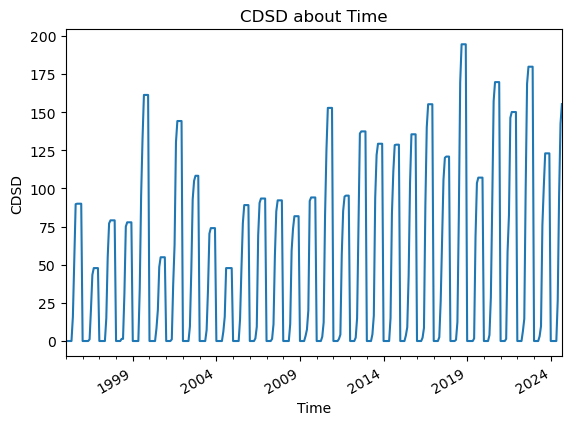

In [107]:
#4.2
#绘制CDSD关于时间的序列
# 读取CSV文件，确保DATE列被正确解析为日期类型
df = pd.read_csv('USC00177238.csv', parse_dates=['DATE'])
# 将DATE列设置为DataFrame的索引
df.set_index('DATE', inplace=True)
# 将CDSD列转换为数值类型，非数值转换为NaN
df['CDSD'] = pd.to_numeric(df['CDSD'], errors='coerce')
# 删除CDSD列为NaN的行
df = df.dropna(subset=['CDSD'])
# 确保只对数值列进行操作
numeric_cols = df.select_dtypes(include=['number']).columns
# 按月重采样并计算每个月份的CDSD平均值
mean = df[numeric_cols].resample('M').mean()
# 绘制CDSD随时间变化的序列图
mean['CDSD'].plot()
plt.title('CDSD about Time')
plt.xlabel('Time')
plt.ylabel('CDSD')
plt.gcf().autofmt_xdate()
plt.show()

In [111]:
#4.3
#4.3.1
#查看CDSD的描述性统计信息，包括平均值、中位数、最大值、最小值、标准差
desc_stats = df['CDSD'].describe()
print(desc_stats)

count    357.000000
mean      52.988235
std       58.563919
min        0.000000
25%        0.000000
50%       26.100000
75%       94.100000
max      194.500000
Name: CDSD, dtype: float64


In [113]:
#4.3.2
#检查CDSD列中缺失值的数量和比例
missing_values = df['CDSD'].isna().sum()
total_values = len(df['CDSD'])
missing_percentage = missing_values / total_values
print(f"Missing values: {missing_values}, Missing percentage: {missing_percentage:.2%}")

Missing values: 0, Missing percentage: 0.00%


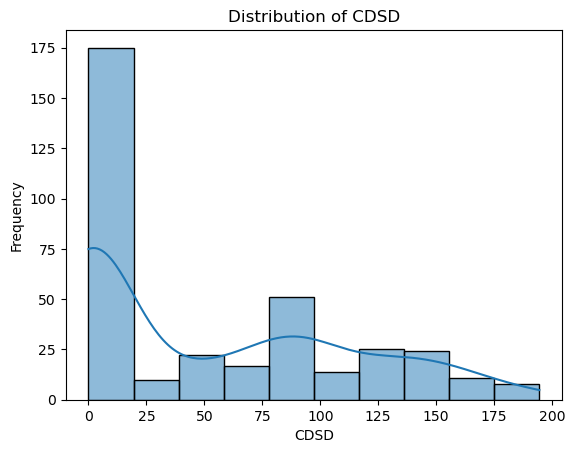

In [118]:
#4.3.3
#检查CDSD的数据分布
import seaborn as sns
sns.histplot(df['CDSD'], kde=True)
plt.title('Distribution of CDSD')
plt.xlabel('CDSD')
plt.ylabel('Frequency')
plt.show()

In [120]:
#4.3.4
#检查CDSD列中的异常值
Q1 = df['CDSD'].quantile(0.25)
Q3 = df['CDSD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['CDSD'] < lower_bound) | (df['CDSD'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 0


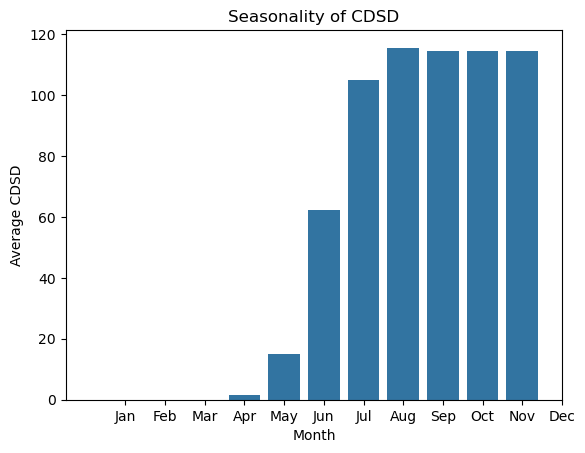

In [124]:
#4.3.5
#检查CDSD是否存在季节性变化
df['DATE'] = pd.to_datetime(df.index)
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
monthly_cdsd = df.groupby('Month')['CDSD'].mean()
sns.barplot(x=monthly_cdsd.index, y=monthly_cdsd.values)
plt.title('Seasonality of CDSD')
plt.xlabel('Month')
plt.ylabel('Average CDSD')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()